# Cubic spline interpolation

We will approximate the function
$$
f(x) = (1-x^2)^2 \sin(4\pi x) \exp(\sin(2\pi x)), \qquad x \in [-1,+1]
$$
We have taken an example for which 
$$
f'(-1) = f'(+1) = 0
$$
which will be used in constructing the cubic spline below.

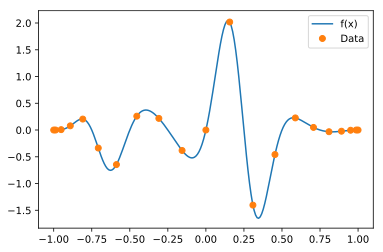

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from numpy import linspace,sin,cos,exp,pi,polyfit,polyval,zeros
from numpy.linalg import solve
from matplotlib.pyplot import plot,legend

xmin, xmax = -1.0, +1.0
f = lambda x: (1-x**2)**2*sin(4*pi*x)*exp(sin(2*pi*x))

N = 20
x = cos(linspace(0,pi,N+1))
y = f(x)
xe = linspace(xmin,xmax,200)
ye = f(xe)
plot(xe,ye,x,y,'o')
legend(('f(x)','Data'))

Let us first try polynomial interpolation using Chebyshev points.

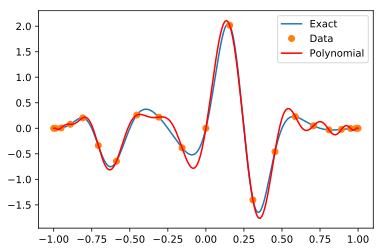

In [6]:
p = polyfit(x,y,N)
yp = polyval(p,xe)
plot(xe,ye,x,y,'o',xe,yp,'r-')
legend(('Exact','Data','Polynomial'));

We see that polynomial interpolation is rather oscillatory. Of course this will become better as we increase the number of samples. Using uniformly spaced points for polynomial interpolation would have given us even bad approximation. We will next try cubic spline interpolation. First we implement a function which constructs the matrix and right hand side.

In [7]:
def spline_matrix(x,y):
    N = len(x) - 1
    h = x[1:] - x[0:-1]
    A = zeros((N+1,N+1))
    A[0][0] = h[0]/3; A[0][1] = h[0]/6
    for i in range(1,N):
        A[i][i-1] = h[i-1]/6; A[i][i] = (h[i-1]+h[i])/3; A[i][i+1] = h[i]/6
    A[N][N-1] = h[N-1]/6; A[N][N] = h[N-1]/3
    
    r = zeros(N+1)
    r[0] = (y[1] - y[0])/h[0]
    for i in range(1,N):
        r[i] = (y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]
    r[N] = -(y[N]-y[N-1])/h[N-1]
    return A,r

We will use uniformly spaced points for spline interpolation. We first construct the matrix and right hand side and solve the matrix problem. Finally, we evaluate the spline in each interval to make a plot.

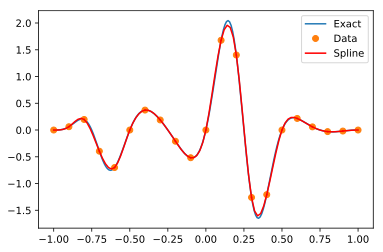

In [8]:
x = linspace(xmin,xmax,N+1)
y = f(x)

A,r = spline_matrix(x,y)
m = solve(A,r)

plot(xe,ye,x,y,'o')
for i in range(0,N):
    h  = x[i+1] - x[i]
    xs = linspace(x[i],x[i+1],6)
    ys = ((x[i+1]-xs)**3*m[i] + (xs-x[i])**3*m[i+1])/(6*h) \
         + ((x[i+1]-xs)*y[i] + (xs-x[i])*y[i+1])/h \
         - ((x[i+1]-xs)*m[i] + (xs-x[i])*m[i+1])*h/6
    plot(xs,ys,'r-')

legend(('Exact','Data','Spline'));

We see that spline gives a better approximation and does not have too much oscillation.